Step 1: Install Required Libraries


In [7]:
# Install sentence-transformers for advanced NLP embeddings
!pip install sentence-transformers


  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

In [1]:
!pip install feedparser


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 2.9 MB/s eta 0:00:00
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6047 sha256=fa11d85ff7f7a066c12fb358f123b0b4a03d8e8c73a3092decb104a8d6970ca1
  Stored in directory: /root/.cache/pip/wheels/f0/69/93/a47e9d621be168e9e33c7ce60524393c0b92ae83cf6c6e89c5
Successfully built sgmllib3k


Step 2: Fetch Google News Alerts

In [2]:
import feedparser
import pandas as pd

# Fetch Google News Alerts using the RSS feed
google_news_feed_url = "https://www.google.com/alerts/feeds/00541132964398865042/18046012592204646289"
google_news_feed = feedparser.parse(google_news_feed_url)

# Extract relevant details from the feed, such as titles and links (or descriptions if available)
google_news_articles = []
for entry in google_news_feed.entries:
    google_news_articles.append({
        'title': entry.title,
        'link': entry.link,
        'description': entry.summary  # Using 'summary' for content, may vary by feed
    })

# Convert to a DataFrame for consistency
google_df = pd.DataFrame(google_news_articles)
google_df['article_text'] = google_df['description']  # Simulate article content with 'description'
google_df.head()


,title,link,description,article_text
0,Anchorage reckons with deadly <b>police</b> sh...,https://www.google.com/url?rct=j&sa=t&url=http...,At least ten <b>shots</b> can be heard in the ...,At least ten <b>shots</b> can be heard in the ...
1,Anchorage mayor apologizes to family of teen <...,https://www.google.com/url?rct=j&sa=t&url=http...,"Noel Senoran, <b>Officer</b>&nbsp;...","Noel Senoran, <b>Officer</b>&nbsp;..."


Step 3: Upload Custom System Data

In [3]:
from google.colab import files

# Upload the custom system data (CSV) directly from your local machine to Google Colab
uploaded = files.upload()

# Load the uploaded CSV file into a DataFrame
df = pd.read_csv(next(iter(uploaded)))

# Display the first few rows to check the structure of the DataFrame
df.head()


Saving project-159-2024-05-27.csv to project-159-2024-05-27.csv


,id,project_id,model_id,model_score,published_date,queued_date,processed_date,posted_date,above_threshold,model_1_score,model_2_score,source,url,normalized_url
0,10299899,159,13,0.105809,2024-05-24 07:42:56,2024-05-25 06:11:42.140398,2024-05-25 06:13:16.3926,NaN,f,0.265022,0.399245,newscatcher,https://ghanaguardian.com/rice-farmer-shot-dea...,http://ghanaguardian.com/rice-farmer-shot-dead...
1,10299900,159,13,0.499563,2024-05-24 02:34:43,2024-05-25 06:11:42.140398,2024-05-25 06:13:16.3926,NaN,f,0.719628,0.694196,newscatcher,https://www.eonline.com/news/1402328/tiktoker-...,http://eonline.com/news/1402328/tiktoker-remi-...
2,10299901,159,13,0.357398,2024-05-24 04:00:00,2024-05-25 06:11:42.140398,2024-05-25 06:13:16.3926,NaN,f,0.382755,0.933753,newscatcher,https://www.americanthinker.com/blog/2024/05/a...,http://americanthinker.com/blog/2024/05/at_ucl...
3,10299902,159,13,0.069066,2024-05-24 19:34:03,2024-05-25 06:11:42.140398,2024-05-25 06:13:16.3926,NaN,f,0.119041,0.580190,newscatcher,https://www.972mag.com/issam-younis-al-mezan-i...,http://972mag.com/issam-younis-al-mezan-icc-ic...
4,10299903,159,13,0.037209,2024-05-24 11:01:54,2024-05-25 06:11:42.140398,2024-05-25 06:13:16.3926,NaN,f,0.679870,0.054729,newscatcher,https://palexander.substack.com/p/th-bronx-new...,http://palexander.substack.com/p/th-bronx-new-...


Step 4: Preprocess and Combine Data

In [4]:
# Preprocess the custom system data
df['article_text'] = df['url']  # This is a placeholder. Replace with actual content fetching.
df_relevant = df[df['above_threshold'] == 't']  # Filter relevant rows

# Add a source column to differentiate between the two systems
df_relevant['source'] = 'custom_system'
google_df['source'] = 'google_news'

# Combine the two DataFrames
combined_df = pd.concat([df_relevant[['article_text', 'source']], google_df[['article_text', 'source']]], ignore_index=True)
combined_df.head()


<ipython-input-4-864ddca4da1c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_relevant['source'] = 'custom_system'


,article_text,source
0,https://upstract.com/x/4ae62ca445ad1dd4,custom_system
1,https://www.arcamax.com/newsheadlines/s-3259882,custom_system
2,https://www.yahoo.com/news/jury-awards-10-mill...,custom_system
3,https://www.washingtonpost.com/world/2024/05/2...,custom_system
4,https://www.eagletribune.com/region/jury-award...,custom_system


Step 5: Generate Sentence Embeddings

In [8]:
from sentence_transformers import SentenceTransformer
import numpy as np

# Load a pre-trained Sentence Transformer model
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

# Generate embeddings for all articles
embeddings = model.encode(combined_df['article_text'].tolist(), convert_to_tensor=True)

# Convert embeddings to numpy arrays for further processing
embeddings = embeddings.cpu().detach().numpy()


/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.73k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/314 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Step 6: Compute Cosine Similarity

In [9]:
from sklearn.metrics.pairwise import cosine_similarity

# Compute cosine similarity between all embeddings
cosine_sim_matrix = cosine_similarity(embeddings, embeddings)


Step 7: Identify Matching Articles

In [12]:
# Set a similarity threshold (e.g., 0.5) to identify matching articles
similarity_threshold = 0.3
matching_pairs = []

for i in range(len(combined_df)):
    for j in range(i+1, len(combined_df)):
        if cosine_sim_matrix[i, j] > similarity_threshold and combined_df.iloc[i]['source'] != combined_df.iloc[j]['source']:
            matching_pairs.append((combined_df.iloc[i]['source'], combined_df.iloc[i]['article_text'],
                                   combined_df.iloc[j]['source'], combined_df.iloc[j]['article_text'], cosine_sim_matrix[i, j]))

# Print out the number of matching pairs found
print(f"Number of matching pairs found: {len(matching_pairs)}")

# Optionally, print a few matching pairs for inspection
for match in matching_pairs[:5]:  # Show a few examples
    print(f"Source 1: {match[0]}")
    print(f"Article 1: {match[1]}")
    print(f"Source 2: {match[2]}")
    print(f"Article 2: {match[3]}")
    print(f"Similarity: {match[4]:.2f}\n")


Number of matching pairs found: 24
Source 1: custom_system
Article 1: https://www.theepochtimes.com/world/inquest-into-bc-police-shooting-deaths-recommends-emergency-events-be-recorded-5637960
Source 2: google_news
Article 2: At least ten <b>shots</b> can be heard in the videos before Handy collapsed and <b>died</b> on the scene. Last month, KTUU reported that the state had determined&nbsp;...
Similarity: 0.47

Source 1: custom_system
Article 1: https://www.yahoo.com/news/one-afternoon-gastonia-three-shootings-160218356.html
Source 2: google_news
Article 2: At least ten <b>shots</b> can be heard in the videos before Handy collapsed and <b>died</b> on the scene. Last month, KTUU reported that the state had determined&nbsp;...
Similarity: 0.32

Source 1: custom_system
Article 1: https://www.nbc-2.com/article/fort-myers-police-justified-force-christopher-jordan-deadly-shooting/60815659
Source 2: google_news
Article 2: At least ten <b>shots</b> can be heard in the videos before Handy colla

Step 8: Visualize the Results

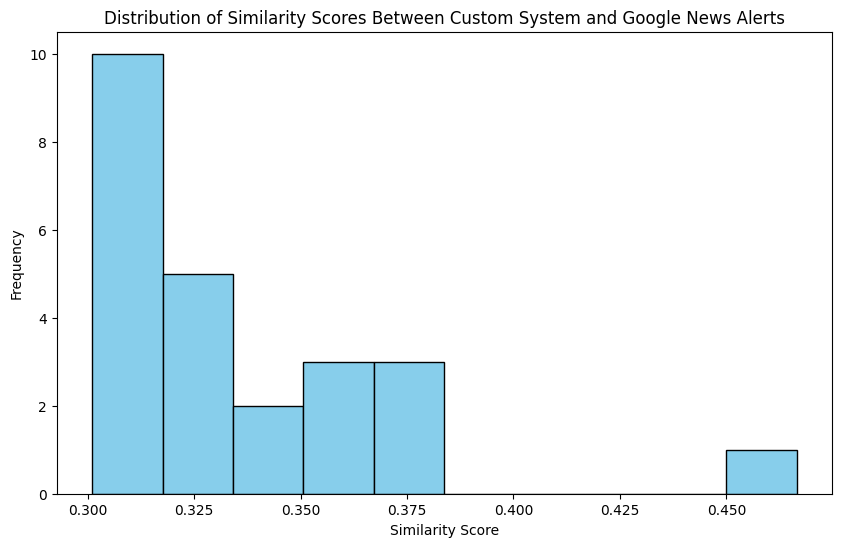

In [13]:
import matplotlib.pyplot as plt

# Visualization of the similarity scores
similarity_scores = [match[4] for match in matching_pairs]

if similarity_scores:
    # Create a histogram to show the distribution of similarity scores
    plt.figure(figsize=(10, 6))
    plt.hist(similarity_scores, bins=10, color='skyblue', edgecolor='black')
    plt.title('Distribution of Similarity Scores Between Custom System and Google News Alerts')
    plt.xlabel('Similarity Score')
    plt.ylabel('Frequency')
    plt.show()
else:
    print("No matching pairs found to visualize.")
